In [1]:
# First would be to install lightweight_mmm
!pip install --upgrade git+https://github.com/google/lightweight_mmm.git
!pip uninstall -y matplotlib
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/google/lightweight_mmm.git to /tmp/pip-req-build-08x_vlzv
  Running command git clone --filter=blob:none --quiet https://github.com/google/lightweight_mmm.git /tmp/pip-req-build-08x_vlzv
  Resolved https://github.com/google/lightweight_mmm.git to commit 038521fd747327667b533e06e48171ea7bff4285
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.2/300.2 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.0/285.0 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 52.1 MB/s eta 0:00:00
  Created wheel for lightweight-mmm: filename=lightweight_mmm-0.1.9-py3-none-any.whl size=105221 sha256=d3d92ed4775342b9f7737564a57

Found existing installation: matplotlib 3.6.1
Uninstalling matplotlib-3.6.1:
  Successfully uninstalled matplotlib-3.6.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 MB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
ERROR: Operation cancelled by user


In [1]:
# Import jax.numpy and any other library we might need.
import jax.numpy as jnp
import numpyro
import pandas as pd

In [3]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 43.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lightweight-mmm 0.1.9 requires matplotlib==3.6.1, but you have matplotlib 3.7.1 which is incompatible.


In [4]:
# Import the relevant modules of the library
from lightweight_mmm import lightweight_mmm
from lightweight_mmm import optimize_media
from lightweight_mmm import plot
from lightweight_mmm import preprocessing
from lightweight_mmm import utils

In [11]:
pwd

'/content'

In [12]:
ls

'bike data.csv'   sample_data/


## Organising the data for modelling

In [13]:
csv="/content/bike_sales_data.csv"
df=pd.read_csv(csv) #, index_col=0)
df

,Week,sales,branded_search_spend,nonbranded_search_spend,facebook_spend,print_spend,ooh_spend,tv_spend,radio_spend
0,7/23/17,58850.0000,1528.80,463.3200,802.6200,0,0,0,0
1,7/30/17,62050.0000,1575.60,468.0000,819.3120,0,0,0,0
2,8/6/17,59388.0000,1544.40,477.3600,749.0340,0,0,0,0
3,8/13/17,56964.0000,1528.80,468.0000,741.4680,0,0,0,0
4,8/20/17,53460.0000,1560.00,458.6400,811.2000,0,0,0,0
...,...,...,...,...,...,...,...,...,...
255,6/12/22,98173.4880,3466.32,814.9285,1715.8284,1000,0,2500,0
256,6/19/22,104221.7248,3534.96,829.0855,1802.8296,0,0,2500,0
257,6/26/22,103283.6800,3363.36,793.6930,1631.2296,0,0,2500,0
258,7/3/22,105279.5200,3534.96,829.0855,1855.8540,0,0,2500,0


In [14]:
df.columns

Index(['Week', 'sales', 'branded_search_spend', 'nonbranded_search_spend',
       'facebook_spend', 'print_spend', 'ooh_spend', 'tv_spend',
       'radio_spend'],
      dtype='object')

In [15]:
media_data = df[['branded_search_spend', 'nonbranded_search_spend','facebook_spend', 'print_spend', 'ooh_spend','tv_spend', 'radio_spend']].to_numpy()
target = df[['sales']].to_numpy()
costs = df[['branded_search_spend', 'nonbranded_search_spend','facebook_spend', 'print_spend', 'ooh_spend','tv_spend', 'radio_spend']].sum().to_numpy()

In [16]:
media_data.shape

(260, 7)

In [17]:
data_size = media_data.shape[0]

In [18]:
# Split and scale data.
split_point = data_size - 30
# Media data
media_data_train = media_data[:split_point, ...]
media_data_test = media_data[split_point:, ...]
# Target
target_train = target[:split_point].reshape(-1)

In [19]:
media_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
target_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
cost_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)

media_data_train = media_scaler.fit_transform(media_data_train)
target_train = target_scaler.fit_transform(target_train)
costs2 = cost_scaler.fit_transform(costs)

In [20]:
mmm = lightweight_mmm.LightweightMMM(model_name="carryover")

In [21]:
number_warmup=100
number_samples=100


In [22]:

mmm.fit(
    media=media_data_train,
    media_prior=costs2,
    target=target_train,
    number_warmup=number_warmup,
    number_samples=number_samples,
    number_chains=1,
    )

sample: 100%|██████████| 200/200 [01:31<00:00,  2.18it/s, 1023 steps of size 9.05e-03. acc. prob=0.62]


In [23]:
mmm.print_summary()


                                 mean       std    median      5.0%     95.0%     n_eff     r_hat
ad_effect_retention_rate[0]      0.17      0.13      0.13      0.01      0.37      6.41      1.00
ad_effect_retention_rate[1]      0.56      0.31      0.59      0.09      0.97     23.58      1.00
ad_effect_retention_rate[2]      0.23      0.23      0.16      0.01      0.60     13.67      0.99
ad_effect_retention_rate[3]      0.41      0.26      0.36      0.04      0.79      7.39      1.02
ad_effect_retention_rate[4]      0.33      0.27      0.19      0.01      0.78      9.91      1.08
ad_effect_retention_rate[5]      0.36      0.31      0.22      0.03      0.91     16.43      1.06
ad_effect_retention_rate[6]      0.44      0.19      0.48      0.15      0.72     18.13      1.08
              coef_media[0]      0.08      0.06      0.06      0.01      0.17     10.17      1.03
              coef_media[1]      0.24      0.08      0.22      0.06      0.33     17.25      1.07
              coef_

/usr/local/lib/python3.10/dist-packages/arviz/stats/density_utils.py:957: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "histogram" failed type inference due to: non-precise type pyobject
During: typing of argument at /usr/local/lib/python3.10/dist-packages/arviz/stats/density_utils.py (979)

File "../usr/local/lib/python3.10/dist-packages/arviz/stats/density_utils.py", line 979:
def histogram(data, bins, range_hist=None):
    <source elided>
    """
    hist, bin_edges = np.histogram(data, bins=bins, range=range_hist)
    ^

  @conditional_jit(cache=True)
/usr/local/lib/python3.10/dist-packages/numba/core/object_mode_passes.py:151: NumbaWarning: Function "histogram" was compiled in object mode without forceobj=True.

File "../usr/local/lib/python3.10/dist-packages/arviz/stats/density_utils.py", line 958:
@conditional_jit(cache=True)
def histogram(data, bins, range_hist=None):
^

  warnings.warn(errors.NumbaWarning(warn_msg,
/usr/lo

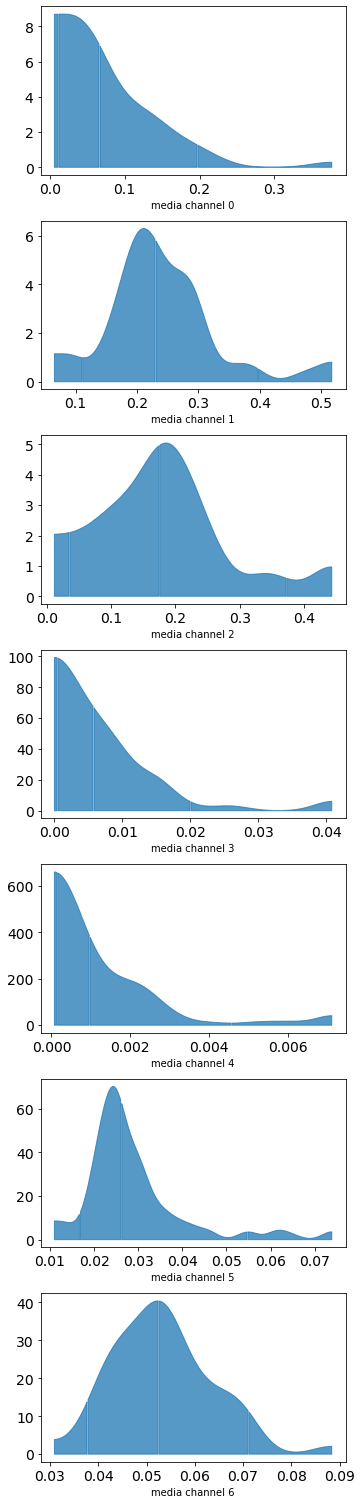

In [24]:
plot.plot_media_channel_posteriors(media_mix_model=mmm)

/usr/local/lib/python3.10/dist-packages/arviz/stats/stats_utils.py:509: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "stats_variance_1d" failed type inference due to: non-precise type pyobject
During: typing of argument at /usr/local/lib/python3.10/dist-packages/arviz/stats/stats_utils.py (511)

File "../usr/local/lib/python3.10/dist-packages/arviz/stats/stats_utils.py", line 511:
def stats_variance_1d(data, ddof=0):
    a_a, b_b = 0, 0
    ^

  @conditional_jit
/usr/local/lib/python3.10/dist-packages/arviz/stats/stats_utils.py:509: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "stats_variance_1d" failed type inference due to: Cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "../usr/local/lib/python3.10/dist-packages/arviz/stats/stats_utils.py", line 512:
def stats_variance_1d(data, ddof=0):
    <source elided>
    a_a, b_b = 0, 0
    for i in d

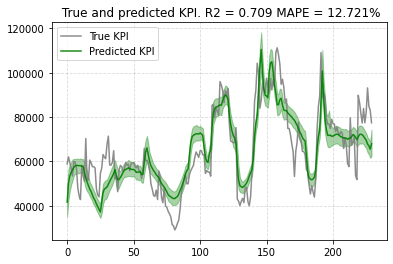

In [25]:
plot.plot_model_fit(mmm, target_scaler=target_scaler)

In [26]:
# We have to scale the test media data if we have not done so before.
new_predictions = mmm.predict(media=media_scaler.transform(media_data_test))
new_predictions.shape

(100, 30)

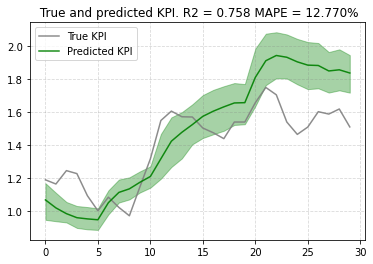

In [27]:
plot.plot_out_of_sample_model_fit(out_of_sample_predictions=new_predictions,
                                 out_of_sample_target=target_scaler.transform(target[split_point:].squeeze()))

### Media insights

In [28]:
media_contribution, roi_hat = mmm.get_posterior_metrics(target_scaler=target_scaler, cost_scaler=cost_scaler)

In [29]:
from matplotlib import pyplot as plt
import numpy as np

def custom_plot_media_baseline_contribution_area_plot(
        media_mix_model,
        target_scaler=None,
        channel_names=None,
        fig_size = (20, 7)):
      """Plots an area chart to visualize weekly media & baseline contribution.

      Args:
        media_mix_model: Media mix model.
        target_scaler: Scaler used for scaling the target.
        channel_names: Names of media channels.
        fig_size: Size of the figure to plot as used by matplotlib.

      Returns:
        Stacked area chart of weekly baseline & media contribution.
      """
      # Create media channels & baseline contribution dataframe.
      contribution_df = plot.create_media_baseline_contribution_df(
          media_mix_model=media_mix_model,
          target_scaler=target_scaler,
          channel_names=channel_names)
      contribution_df = contribution_df.clip(0)

      # Create contribution dataframe for the plot.
      contribution_columns = [
          col for col in contribution_df.columns if "contribution" in col
      ]
      contribution_df_for_plot = contribution_df.loc[:, contribution_columns]
      contribution_df_for_plot = contribution_df_for_plot[
          contribution_df_for_plot.columns[::-1]]
      period = np.arange(1, contribution_df_for_plot.shape[0] + 1)
      contribution_df_for_plot.loc[:, "period"] = period

      # Plot the stacked area chart.
      fig, ax = plt.subplots()
      contribution_df_for_plot.plot.area(
          x="period", stacked=True, figsize=fig_size, ax=ax)
      ax.set_title("Attribution Over Time", fontsize="x-large")
      ax.tick_params(axis="y")
      ax.set_ylabel("Baseline & Media Chanels Attribution")
      ax.set_xlabel("Period")
      ax.set_xlim(1, contribution_df_for_plot["period"].max())
      ax.set_xticks(contribution_df_for_plot["period"])
      ax.set_xticklabels(contribution_df_for_plot["period"])
      for tick in ax.get_xticklabels():
        tick.set_rotation(45)
      plt.close()
      return fig


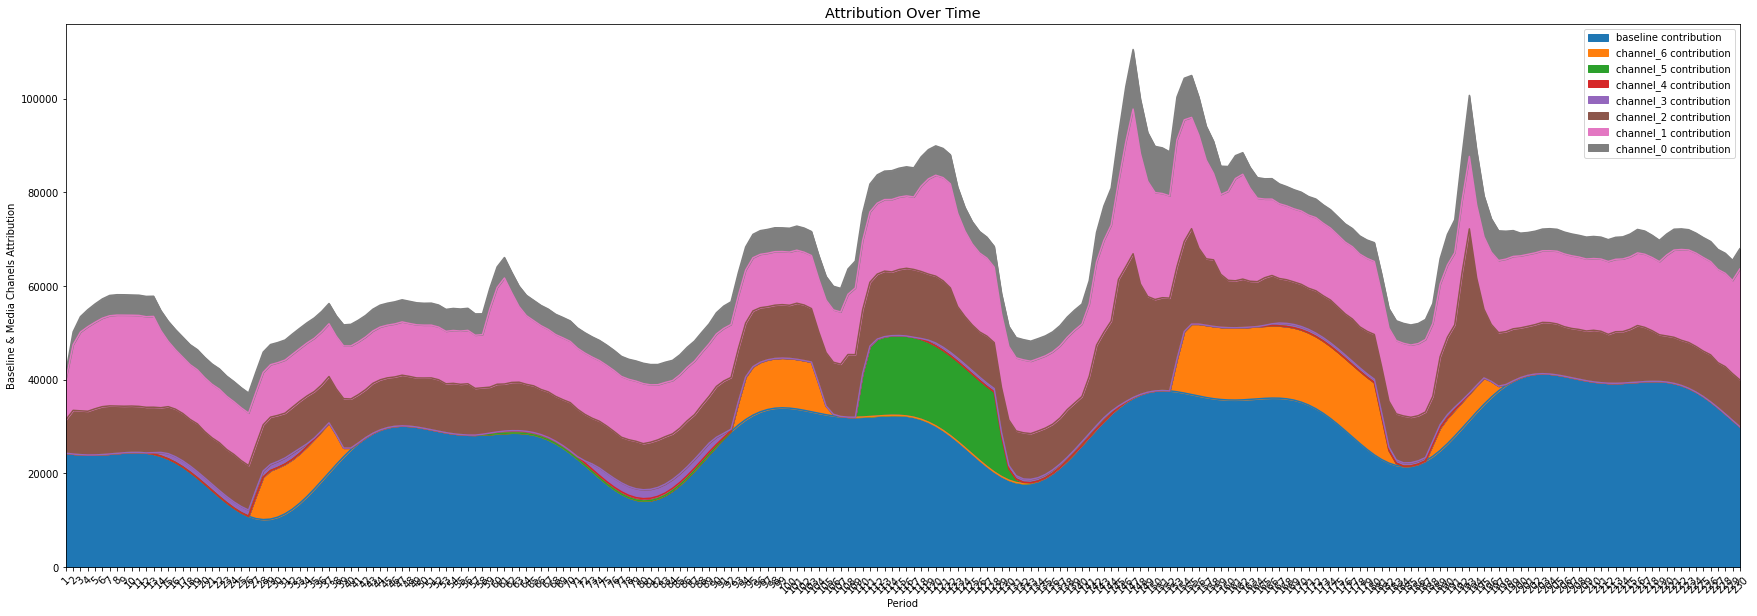

In [30]:
custom_plot_media_baseline_contribution_area_plot(media_mix_model=mmm,
                                                target_scaler=target_scaler,
                                                fig_size=(30,10))

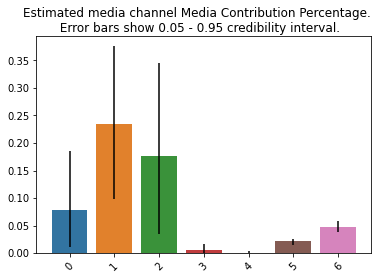

In [31]:
plot.plot_bars_media_metrics(metric=media_contribution, metric_name="Media Contribution Percentage")

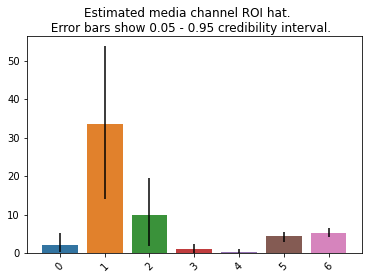

In [32]:
plot.plot_bars_media_metrics(metric=roi_hat, metric_name="ROI hat")

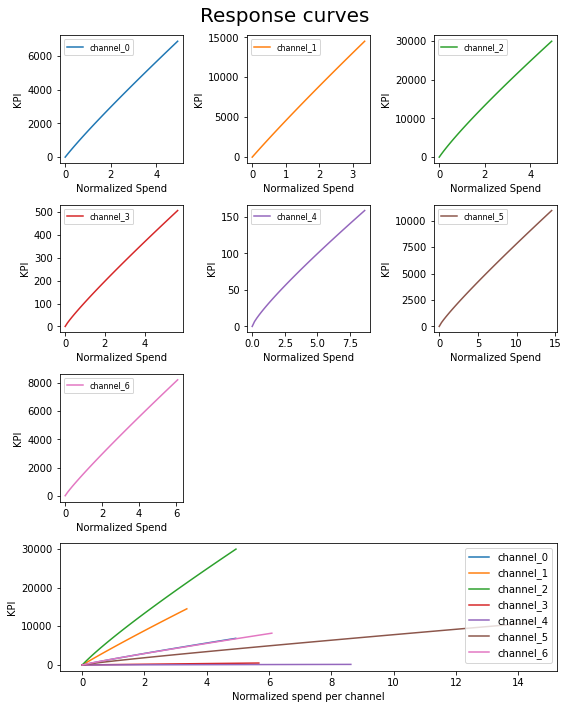

In [33]:
plot.plot_response_curves(
    media_mix_model=mmm, target_scaler=target_scaler)

# Optimization

In [34]:
prices = jnp.ones(mmm.n_media_channels)

In [35]:
n_time_periods = 10
budget = jnp.sum(jnp.dot(prices, media_data.mean(axis=0)))* n_time_periods

In [36]:
# Run optimization with the parameters of choice.
solution, kpi_without_optim, previous_budget_allocation = optimize_media.find_optimal_budgets(
    n_time_periods=n_time_periods,
    media_mix_model=mmm,
    budget=budget,
    prices=prices,
    media_scaler=media_scaler,
    target_scaler=target_scaler)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -698362.8462973268
            Iterations: 23
            Function evaluations: 352
            Gradient evaluations: 23


In [37]:
# Obtain the optimal weekly allocation.
optimal_buget_allocation = prices * solution.x
optimal_buget_allocation

Array([19352.225 ,  4231.6924, 11376.33  ,  2539.1304,  1113.0433,
        2478.2612,  7095.6533], dtype=float32)

## We can plot the following:
1. Pre post optimization budget allocation comparison for each channel
2. Pre post optimization predicted target variable comparison

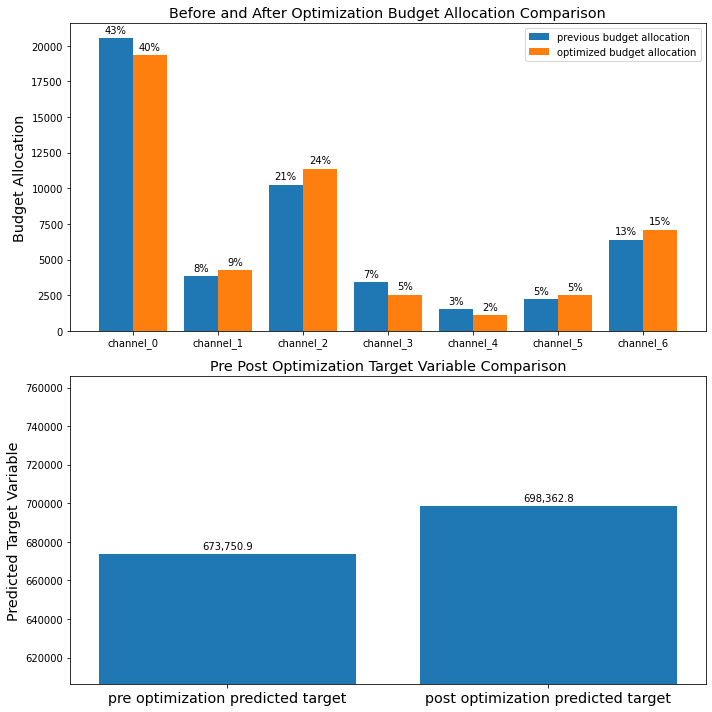

In [38]:
# Plot out pre post optimization budget allocation and predicted target variable comparison.
plot.plot_pre_post_budget_allocation_comparison(media_mix_model=mmm, 
                                                kpi_with_optim=solution['fun'], 
                                                kpi_without_optim=kpi_without_optim,
                                                optimal_buget_allocation=optimal_buget_allocation, 
                                                previous_budget_allocation=previous_budget_allocation, 
                                                figure_size=(10,10))